In [25]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score



In [147]:
data  = pd.read_csv('data/water_potability.csv')


col = data.columns


data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [160]:
data.Potability.value_counts()



0    1998
1    1278
Name: Potability, dtype: int64

In [220]:
from sklearn.preprocessing import StandardScaler
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]

scaler = StandardScaler()

std = 2.2                    ##### 이상치 표준편차로  2.2 넘어가면 모두 NaN 로 반환 >> 3 일시 99퍼  2일시는 몇퍼더라 까먹음 

notpotable_scaled = scaler.fit_transform(notpotable)
potable_scaled = scaler.fit_transform(potable)

potable_scaled = pd.DataFrame(potable_scaled,columns = col)
notpotable_scaled = pd.DataFrame(notpotable_scaled,columns = col)


potable_outlier =  abs(potable_scaled) >=std
notpotable_outlier =  abs(notpotable_scaled) >=std

potable_outlier= potable_outlier.replace(True,np.NaN)
potable_outlier =potable_outlier.replace(False,0)

notpotable_outlier= notpotable_outlier.replace(True,np.NaN)
notpotable_outlier =notpotable_outlier.replace(False,0)

               
potable_scaled = potable_scaled*0
potable_outlier = potable_scaled*0+potable_outlier

notpotable_scaled = notpotable_scaled*0
notpotable_outlier = notpotable_scaled*0+notpotable_outlier



potable = potable.reset_index()
notpotable = notpotable.reset_index()

potable = potable.drop(columns=['index'], axis = 1) + potable_outlier
notpotable = notpotable.drop(columns=['index'], axis = 1) +notpotable_outlier




In [221]:
from sklearn.utils import shuffle
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
  

col = data.columns
imp = IterativeImputer(max_iter=10, random_state=0)




imp.fit(potable)
potable_imp =  pd.DataFrame(imp.transform(potable), columns = col)


imp.fit(notpotable)
notpotable_imp =  pd.DataFrame(imp.transform(notpotable), columns = col)

data = pd.concat([notpotable_imp ,potable_imp])
data = data.reset_index()
data = data.drop(columns=['index'], axis = 1)

data = shuffle(data)
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.058368
Chloramines        0.054208
Sulfate            0.040037
Trihalomethanes    0.019232
Turbidity         -0.008108
Hardness          -0.013994
ph                -0.015758
Conductivity      -0.025882
Organic_carbon    -0.053340
Name: Potability, dtype: float64

In [222]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2398,7.871961,219.622659,12760.437151,8.076613,360.086657,350.826916,15.698726,84.158080,3.946123,1.0
779,8.594416,204.209321,15791.675351,5.912691,322.329604,425.210222,14.216384,54.961285,3.568992,0.0
2851,6.114332,178.446286,30606.223593,5.568042,325.558867,472.255403,16.711471,66.383570,3.680410,1.0
1063,7.260904,189.077962,21391.162544,6.576866,356.622222,390.285266,14.391606,81.082456,4.383823,0.0
859,6.361667,175.043999,25833.851713,8.243781,333.947107,422.327899,10.558576,70.107693,3.681765,0.0
...,...,...,...,...,...,...,...,...,...,...
2812,6.701941,168.745414,17176.878951,6.390966,330.674729,404.930726,10.827840,52.112707,4.179450,1.0
351,6.715140,183.488839,12675.938962,7.028873,319.870584,482.445026,13.309723,66.905142,3.240419,0.0
2740,7.773758,195.928693,21688.616943,6.194910,326.381071,355.831683,14.324552,67.584311,4.040974,1.0
154,6.751699,203.400452,26325.817699,8.365470,341.895636,381.440388,14.476459,58.293945,3.756007,0.0


In [223]:
data.Potability.value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

In [224]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [225]:



y = data['Potability']
X = data.drop(columns=['Potability'], axis = 1) ### Turbidity 낮은 상관계수 


## test_size 확인 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y, random_state=1)



In [226]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [227]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,
roc_auc_score, average_precision_score, precision_recall_curve, roc_curve,
ConfusionMatrixDisplay,  PrecisionRecallDisplay, RocCurveDisplay)


rf = RandomForestClassifier(n_estimators=300,
                            criterion = 'entropy',
                            max_depth=40,
                            random_state=10,
                            max_features=4,
                            min_samples_leaf=5,
                            n_jobs=-1
                          )



rf.fit(X_train_scaled, y_train)

rf_pred_train = rf.predict(X_train_scaled)
rf_pred_test = rf.predict(X_test_scaled)

print(accuracy_score(y_train, rf_pred_train), accuracy_score(y_test, rf_pred_test))
print(recall_score(y_test, rf_pred_test), f1_score(y_test, rf_pred_test))

0.961323155216285 0.8245614035087719
0.6712328767123288 0.7489082969432315


In [228]:
"딥러닝"

'딥러닝'

In [229]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout, Dense


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=2)

X_train.shape, X_val.shape, X_test.shape

((1572, 9), (393, 9), (1311, 9))

In [231]:
LEARNING_RATE = 0.001
N_EPOCHS = 300
N_BATCHS = 30

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

In [232]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [233]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [234]:
def create_water_model():
    model = keras.Sequential()
    model.add(layers.Dense(units=64, activation='LeakyReLU', input_shape=(9,)))
    model.add(layers.Dense(units=32, activation='LeakyReLU'))
    model.add(layers.Dense(units=16, activation='LeakyReLU'))
    model.add(layers.Dense(units=4, activation='LeakyReLU'))
    
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    return model

In [235]:
LEARNING_RATE = 0.01
N_EPOCHS = 300



model = create_water_model()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE), 
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])

In [236]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/300
52/52 [==============================] - 0s 4ms/step - loss: 0.1358 - accuracy: 0.4596 - val_loss: 0.1356 - val_accuracy: 0.4682
Epoch 2/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.5333 - val_loss: 0.1323 - val_accuracy: 0.4936
Epoch 3/300
52/52 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.5801 - val_loss: 0.1295 - val_accuracy: 0.5649
Epoch 4/300
52/52 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.6135 - val_loss: 0.1272 - val_accuracy: 0.5878
Epoch 5/300
52/52 [==============================] - 0s 1ms/step - loss: 0.1243 - accuracy: 0.6115 - val_loss: 0.1253 - val_accuracy: 0.6132
Epoch 6/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.6173 - val_loss: 0.1236 - val_accuracy: 0.6209
Epoch 7/300
52/52 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.6128 - val_loss: 0.1223 - val_accuracy: 0.6132
Epoch 8/300
5

Epoch 59/300
52/52 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.6346 - val_loss: 0.1085 - val_accuracy: 0.6285
Epoch 60/300
52/52 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.6346 - val_loss: 0.1083 - val_accuracy: 0.6285
Epoch 61/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.6378 - val_loss: 0.1081 - val_accuracy: 0.6285
Epoch 62/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.6378 - val_loss: 0.1079 - val_accuracy: 0.6285
Epoch 63/300
52/52 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.6378 - val_loss: 0.1077 - val_accuracy: 0.6310
Epoch 64/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.6365 - val_loss: 0.1075 - val_accuracy: 0.6285
Epoch 65/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.6359 - val_loss: 0.1072 - val_accuracy: 0.6285
Epoch 

52/52 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.7321 - val_loss: 0.0929 - val_accuracy: 0.7048
Epoch 117/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.7372 - val_loss: 0.0927 - val_accuracy: 0.7125
Epoch 118/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.7385 - val_loss: 0.0925 - val_accuracy: 0.7150
Epoch 119/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.7378 - val_loss: 0.0923 - val_accuracy: 0.7150
Epoch 120/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.7410 - val_loss: 0.0921 - val_accuracy: 0.7150
Epoch 121/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.7417 - val_loss: 0.0919 - val_accuracy: 0.7150
Epoch 122/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.7429 - val_loss: 0.0917 - val_accuracy: 0.7150
Epoch 123/300

52/52 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.7750 - val_loss: 0.0874 - val_accuracy: 0.7303
Epoch 174/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.7750 - val_loss: 0.0874 - val_accuracy: 0.7328
Epoch 175/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.7756 - val_loss: 0.0873 - val_accuracy: 0.7354
Epoch 176/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.7763 - val_loss: 0.0873 - val_accuracy: 0.7354
Epoch 177/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.7737 - val_loss: 0.0873 - val_accuracy: 0.7354
Epoch 178/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.7756 - val_loss: 0.0873 - val_accuracy: 0.7354
Epoch 179/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.7769 - val_loss: 0.0872 - val_accuracy: 0.7379
Epoch 180/300

52/52 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.7846 - val_loss: 0.0872 - val_accuracy: 0.7557
Epoch 231/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.7865 - val_loss: 0.0872 - val_accuracy: 0.7557
Epoch 232/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.7846 - val_loss: 0.0872 - val_accuracy: 0.7583
Epoch 233/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.7846 - val_loss: 0.0872 - val_accuracy: 0.7583
Epoch 234/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.7846 - val_loss: 0.0872 - val_accuracy: 0.7583
Epoch 235/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.7859 - val_loss: 0.0872 - val_accuracy: 0.7608
Epoch 236/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.7885 - val_loss: 0.0871 - val_accuracy: 0.7583
Epoch 237/300

52/52 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.7955 - val_loss: 0.0877 - val_accuracy: 0.7583
Epoch 288/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.7968 - val_loss: 0.0877 - val_accuracy: 0.7557
Epoch 289/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.7962 - val_loss: 0.0877 - val_accuracy: 0.7583
Epoch 290/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 0.7962 - val_loss: 0.0878 - val_accuracy: 0.7583
Epoch 291/300
52/52 [==============================] - 0s 1ms/step - loss: 0.0705 - accuracy: 0.7974 - val_loss: 0.0878 - val_accuracy: 0.7532
Epoch 292/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.7962 - val_loss: 0.0877 - val_accuracy: 0.7583
Epoch 293/300
52/52 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.7974 - val_loss: 0.0878 - val_accuracy: 0.7608
Epoch 294/300

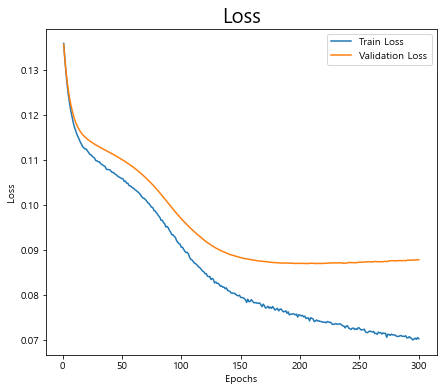

In [237]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

In [238]:
loss, acc = model.evaluate(test_dataset)

44/44 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.7712
